In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
df = pd.read_csv("../data/clean_EventsAdapt_df.csv")

/tmp/ipykernel_11334/1327236539.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/clean_EventsAdapt_df.csv")


In [4]:
df[(df['Metric'] == 'GPT-2-xl.sentence-LL') & (df['TrialType'] == 'AI')]

,Sentence,ItemNum,Score,NormScore,NumTokens,Metric,Plausibility,Voice,TrialType,agent_freq,...,NumWords,agent_freq_norm,patient_freq_norm,verb_freq_norm,sentence_freq_norm,Experiment,SynonymPair,NumSyn,LowerBetter,FinalNormScore
16,The raider caught the illness.,1,-55.528434,0.592244,9.0,GPT-2-xl.sentence-LL,Plausible,active,AI,6.871091,...,5,-0.749246,0.675130,-1.596060,-0.384066,EventsAdapt,1.0,Version1,False,0.592244
17,The illness caught the raider.,1,-61.421801,0.445373,9.0,GPT-2-xl.sentence-LL,Implausible,active,AI,9.653615,...,5,0.675130,-0.749246,-1.596060,-0.384066,EventsAdapt,1.0,Version1,False,0.445373
18,The illness was caught by the raider.,1,-56.734507,0.562187,11.0,GPT-2-xl.sentence-LL,Plausible,passive,AI,6.871091,...,7,-0.749246,0.675130,-1.596060,0.493101,EventsAdapt,1.0,Version1,False,0.562187
19,The raider was caught by the illness.,1,-57.973425,0.531311,11.0,GPT-2-xl.sentence-LL,Implausible,passive,AI,9.653615,...,7,0.675130,-0.749246,-1.596060,0.493101,EventsAdapt,1.0,Version1,False,0.531311
120,The marauder contracted the disease.,2,-52.350811,0.671435,9.0,GPT-2-xl.sentence-LL,Plausible,active,AI,7.113956,...,5,-0.624923,1.403520,1.271642,0.074757,EventsAdapt,1.0,Version2,False,0.671435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31323,The archaeologist was canceled by the trip.,325,-65.105409,0.353572,11.0,GPT-2-xl.sentence-LL,Implausible,passive,AI,11.776243,...,7,1.761706,-0.446943,0.200695,0.982933,EventsAdapt,NaN,NaN,False,0.353572
31424,The Frenchman sliced the baguette.,326,-57.193046,0.550759,10.0,GPT-2-xl.sentence-LL,Plausible,active,AI,6.008813,...,5,-1.190647,-0.623260,-1.425264,-2.044165,EventsAdapt,NaN,NaN,False,0.550759
31425,The baguette sliced the Frenchman.,326,-59.862261,0.484239,10.0,GPT-2-xl.sentence-LL,Implausible,active,AI,7.117206,...,5,-0.623260,-1.190647,-1.425264,-2.044165,EventsAdapt,NaN,NaN,False,0.484239
31426,The baguette was sliced by the Frenchman.,326,-55.843340,0.584396,12.0,GPT-2-xl.sentence-LL,Plausible,passive,AI,6.008813,...,7,-1.190647,-0.623260,-1.425264,-0.692684,EventsAdapt,NaN,NaN,False,0.584396


In [5]:
temp = df[(df['Metric'] == 'GPT-2-xl.sentence-LL') & (df['TrialType'] == 'AI')]
hits = 0
false_alarms = 0
for i in range(0, temp.shape[0], 4):
    if (temp.iloc[i]['FinalNormScore'] - temp.iloc[i+1]['FinalNormScore']) > 0:
        if (i == 0 and (i+1) == 1):
            print(temp.iloc[i]['FinalNormScore'])
            print(temp.iloc[i+1]['FinalNormScore'])
            print(temp.iloc[i]['FinalNormScore'] - temp.iloc[i+1]['FinalNormScore'])
        hits += 1
    else:
        false_alarms += 1
    if (temp.iloc[i+2]['FinalNormScore'] - temp.iloc[i+3]['FinalNormScore']) > 0:
        hits += 1
    else:
        false_alarms += 1
print(hits/(hits+false_alarms))
print(false_alarms/(hits+false_alarms))

0.592243801633545
0.445372550349624
0.14687125128392098
0.9453125
0.0546875


In [6]:
df.columns

Index(['Sentence', 'ItemNum', 'Score', 'NormScore', 'NumTokens', 'Metric',
       'Plausibility', 'Voice', 'TrialType', 'agent_freq', 'patient_freq',
       'sentence_freq', 'verb_freq', 'NumWords', 'agent_freq_norm',
       'patient_freq_norm', 'verb_freq_norm', 'sentence_freq_norm',
       'Experiment', 'SynonymPair', 'NumSyn', 'LowerBetter', 'FinalNormScore'],
      dtype='object')

In [7]:
df['Metric'].unique()

array(['BERT-large.last-word-PLL', 'BERT-large.sentence-PLL',
       'BERT-large.sentence-l2r-PLL', 'BERT-large.verb-PLL',
       'GPT-2-xl.sentence-LL', 'GPT-2-xl.sentence-LL.average_byNrTokens',
       'GPT-2-xl.sentence-LL.average_byNrWords', 'GPT-J.sentence-LL',
       'GPT-J.sentence-LL.average_byNrTokens',
       'GPT-J.sentence-LL.average_byNrWords', 'MPT-30b.sentence-LL',
       'MPT-30b.sentence-LL.average_byNrTokens',
       'MPT-30b.sentence-LL.average_byNrWords', 'MPT-7b.sentence-LL',
       'MPT-7b.sentence-LL.average_byNrTokens',
       'MPT-7b.sentence-LL.average_byNrWords',
       'RoBERTa-large.last-word-PLL', 'RoBERTa-large.sentence-PLL',
       'RoBERTa-large.sentence-l2r-PLL', 'RoBERTa-large.verb-PLL', 'SDM',
       'deBERTa-xxlarge.sentence-PLL', 'human', 'syntax-PPMI',
       'thematicFit.prod', 'tinyLSTM.surprisal'], dtype=object)

In [8]:
df['Plausibility_Binary'] = df['Plausibility'].apply(lambda x: 1 if x == "Plausible" else 0)
df_filtered = df[df['Metric'] == 'GPT-2-xl.sentence-LL']
metrics = ['human','GPT-2-xl.sentence-LL','GPT-J.sentence-LL','MPT-30b.sentence-LL','MPT-7b.sentence-LL']
def d_prime(metrics):
    d_prime_dfs = []
    for metric in metrics:
        df_filtered = df[df['Metric'] == metric]
        d_prime_results = []
        for trial_type, df_group in df_filtered.groupby('TrialType'):
            # mean_score = df_group['FinalNormScore'].mean()
            # std_dev = df_group['FinalNormScore'].std()
            # threshold = mean_score - std_dev
            # threshold = 0.5
        
            # df_group['Hit'] = (df_group['Plausibility_Binary'] == 1) & (df_group['FinalNormScore'] > threshold)
            # df_group['FalseAlarm'] = (df_group['Plausibility_Binary'] == 1) & (df_group['FinalNormScore'] <= threshold)
        
            # num_hits = df_group['Hit'].sum()
            # num_false_alarms = df_group['FalseAlarm'].sum()
            # num_plausible = (df_group['Plausibility_Binary'] == 1).sum()
            # num_implausible = (df_group['Plausibility_Binary'] == 0).sum()
        
            # hit_rate = num_hits / num_plausible if num_plausible > 0 else 0
            # false_alarm_rate = num_false_alarms / num_implausible if num_implausible > 0 else 0
        
            # epsilon = 0.0001
            # hit_rate = min(max(hit_rate, epsilon), 1 - epsilon)
            # false_alarm_rate = min(max(false_alarm_rate, epsilon), 1 - epsilon)
            # temp = df[(df['Metric'] == 'GPT-2-xl.sentence-LL') & (df['TrialType'] == 'AI')]
            hits = 0
            false_alarms = 0
            for i in range(0, df_group.shape[0], 4):
                if (df_group.iloc[i]['FinalNormScore'] - df_group.iloc[i+1]['FinalNormScore']) > 0:
                    hits += 1
                else:
                    false_alarms += 1
                if (df_group.iloc[i+2]['FinalNormScore'] - df_group.iloc[i+3]['FinalNormScore']) > 0:
                    hits += 1
                else:
                    false_alarms += 1
            hit_rate = hits/(hits+false_alarms)
            false_alarm_rate = false_alarms/(hits+false_alarms)
        
            d_prime = norm.ppf(hit_rate) - norm.ppf(false_alarm_rate)

            d_prime_results.append({
                "Metric": metric,
                "TrialType": trial_type,
                "Hit Rate": hit_rate,
                "False Alarm Rate": false_alarm_rate,
                "d-prime": d_prime
            })
        df_d_prime = pd.DataFrame(d_prime_results)
        d_prime_dfs.append(df_d_prime)
    return d_prime_dfs
d_prime_dfs = d_prime(metrics)  

In [9]:
d_prime_dfs

[  Metric TrialType  Hit Rate  False Alarm Rate   d-prime
 0  human       AAN  0.957364          0.042636  3.441774
 1  human       AAR  0.522388          0.477612  0.112296
 2  human        AI  0.992188          0.007812  4.835118,
                  Metric TrialType  Hit Rate  False Alarm Rate   d-prime
 0  GPT-2-xl.sentence-LL       AAN  0.724806          0.275194  1.194359
 1  GPT-2-xl.sentence-LL       AAR  0.462687          0.537313 -0.187335
 2  GPT-2-xl.sentence-LL        AI  0.945312          0.054688  3.202017,
               Metric TrialType  Hit Rate  False Alarm Rate   d-prime
 0  GPT-J.sentence-LL       AAN  0.751938          0.248062  1.361202
 1  GPT-J.sentence-LL       AAR  0.496269          0.503731 -0.018706
 2  GPT-J.sentence-LL        AI  0.945312          0.054688  3.202017,
                 Metric TrialType  Hit Rate  False Alarm Rate   d-prime
 0  MPT-30b.sentence-LL       AAN  0.848837          0.151163  2.062918
 1  MPT-30b.sentence-LL       AAR  0.488806      

In [10]:
trialTypes = ['AI','AAN','AAR']
AIDPrimes = []
AANDPrimes = []
AARDPrimes = []
for d_prime_df in d_prime_dfs:
    for trialType in trialTypes:
        currDPrime = d_prime_df[d_prime_df['TrialType'] == trialType]['d-prime'].iloc[0]
        if trialType == 'AI':
            AIDPrimes.append(currDPrime)
        elif trialType == 'AAN':
            AANDPrimes.append(currDPrime)
        else:
            AARDPrimes.append(currDPrime)

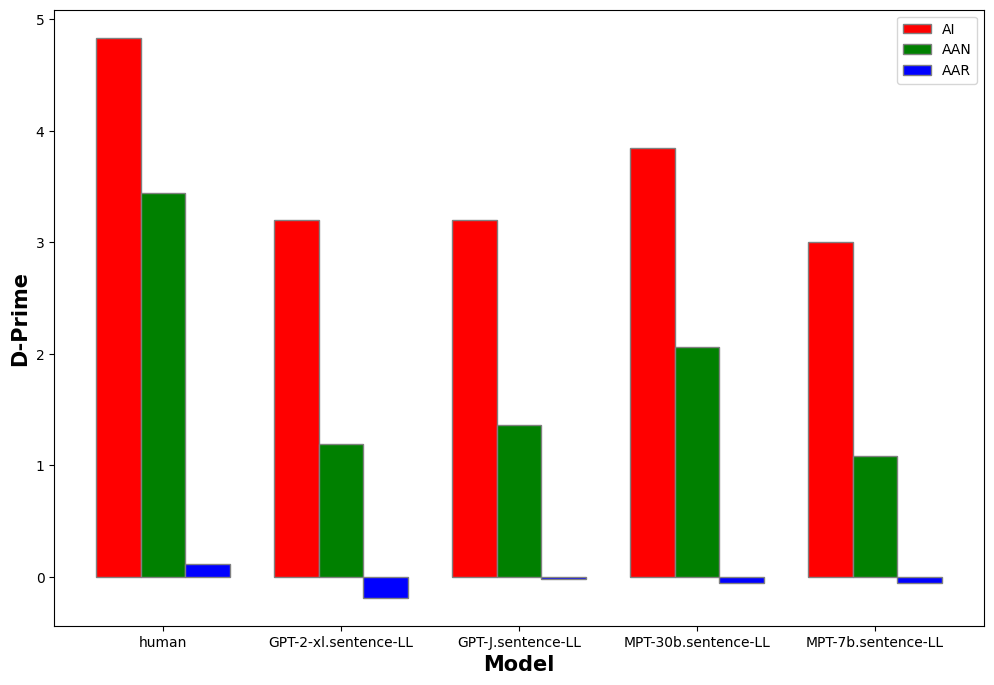

In [11]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

br1 = np.arange(len(AIDPrimes)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, AIDPrimes, color ='r', width = barWidth, 
        edgecolor ='grey', label ='AI') 
plt.bar(br2, AANDPrimes, color ='g', width = barWidth, 
        edgecolor ='grey', label ='AAN') 
plt.bar(br3, AARDPrimes, color ='b', width = barWidth, 
        edgecolor ='grey', label ='AAR') 

plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('D-Prime', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(AIDPrimes))], 
        metrics)

plt.legend()
plt.show() 

In [12]:
def meta_d_prime(metrics):
    meta_d_prime_dfs = []
    
    for metric in metrics:
        df_filtered = df[df['Metric'] == metric]
        meta_d_prime_results = []
        
        for trial_type, df_group in df_filtered.groupby('TrialType'):
            hits = 0
            false_alarms = 0
            confidence_variances = []
            
            for i in range(0, df_group.shape[0] - 3, 4):
                if (df_group.iloc[i]['FinalNormScore'] - df_group.iloc[i+1]['FinalNormScore']) > 0:
                    hits += 1
                else:
                    false_alarms += 1
                if (df_group.iloc[i+2]['FinalNormScore'] - df_group.iloc[i+3]['FinalNormScore']) > 0:
                    hits += 1
                else:
                    false_alarms += 1

                #Variance between pairs used as confidence measure: high variance = low confidence
                pair_scores = df_group.iloc[i:i+2]["FinalNormScore"].values
                confidence_variances.append(np.var(pair_scores))

            hit_rate = hits / (hits + false_alarms) if (hits + false_alarms) > 0 else 0.5
            false_alarm_rate = false_alarms / (hits + false_alarms) if (hits + false_alarms) > 0 else 0.5
            d_prime_value = norm.ppf(hit_rate) - norm.ppf(false_alarm_rate)
            mean_confidence_variance = np.mean(confidence_variances) if confidence_variances else 0
            meta_d_prime_value = d_prime_value / (1 + mean_confidence_variance) if mean_confidence_variance > 0 else d_prime_value
            meta_d_prime_results.append({
                "Metric": metric,
                "TrialType": trial_type,
                "Hit Rate": hit_rate,
                "False Alarm Rate": false_alarm_rate,
                "d-prime": d_prime_value,
                "Confidence Variance": mean_confidence_variance,
                "Meta-d'": meta_d_prime_value,
                "M-ratio": meta_d_prime_value/d_prime_value
            })

        df_meta_d_prime = pd.DataFrame(meta_d_prime_results)
        meta_d_prime_dfs.append(df_meta_d_prime)

    return meta_d_prime_dfs
meta_d_prime_dfs = meta_d_prime(metrics)

In [13]:
meta_d_prime_dfs

[  Metric TrialType  Hit Rate  False Alarm Rate   d-prime  Confidence Variance  \
 0  human       AAN  0.957364          0.042636  3.441774             0.050780   
 1  human       AAR  0.522388          0.477612  0.112296             0.002831   
 2  human        AI  0.992188          0.007812  4.835118             0.160892   
 
     Meta-d'   M-ratio  
 0  3.275448  0.951674  
 1  0.111979  0.997177  
 2  4.165001  0.861406  ,
                  Metric TrialType  Hit Rate  False Alarm Rate   d-prime  \
 0  GPT-2-xl.sentence-LL       AAN  0.724806          0.275194  1.194359   
 1  GPT-2-xl.sentence-LL       AAR  0.462687          0.537313 -0.187335   
 2  GPT-2-xl.sentence-LL        AI  0.945312          0.054688  3.202017   
 
    Confidence Variance   Meta-d'   M-ratio  
 0             0.003558  1.190124  0.996454  
 1             0.001480 -0.187058  0.998522  
 2             0.011376  3.166002  0.988752  ,
               Metric TrialType  Hit Rate  False Alarm Rate   d-prime  \
 0  G

In [14]:
trialTypes = ['AI','AAN','AAR']
AIMDPrimes = []
AANMDPrimes = []
AARMDPrimes = []
for d_prime_df in meta_d_prime_dfs:
    for trialType in trialTypes:
        currDPrime = d_prime_df[d_prime_df['TrialType'] == trialType]["Meta-d'"].iloc[0]
        if trialType == 'AI':
            AIMDPrimes.append(currDPrime)
        elif trialType == 'AAN':
            AANMDPrimes.append(currDPrime)
        else:
            AARMDPrimes.append(currDPrime)

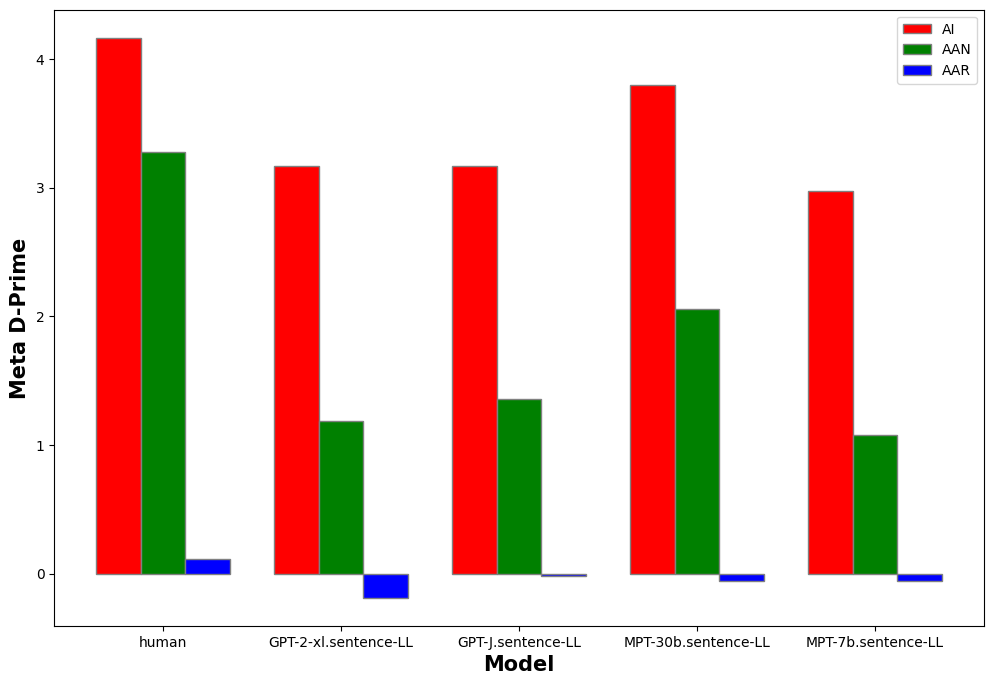

In [15]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

br1 = np.arange(len(AIMDPrimes)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, AIMDPrimes, color ='r', width = barWidth, 
        edgecolor ='grey', label ='AI') 
plt.bar(br2, AANMDPrimes, color ='g', width = barWidth, 
        edgecolor ='grey', label ='AAN') 
plt.bar(br3, AARMDPrimes, color ='b', width = barWidth, 
        edgecolor ='grey', label ='AAR') 

plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('Meta D-Prime', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(AIMDPrimes))], 
        metrics)

plt.legend()
plt.show() 

In [16]:
trialTypes = ['AI','AAN','AAR']
AIMRatios = []
AANMRatios = []
AARMRatios = []
for d_prime_df in meta_d_prime_dfs:
    for trialType in trialTypes:
        currDPrime = d_prime_df[d_prime_df['TrialType'] == trialType]["M-ratio"].iloc[0]
        if trialType == 'AI':
            AIMRatios.append(currDPrime)
        elif trialType == 'AAN':
            AANMRatios.append(currDPrime)
        else:
            AARMRatios.append(currDPrime)

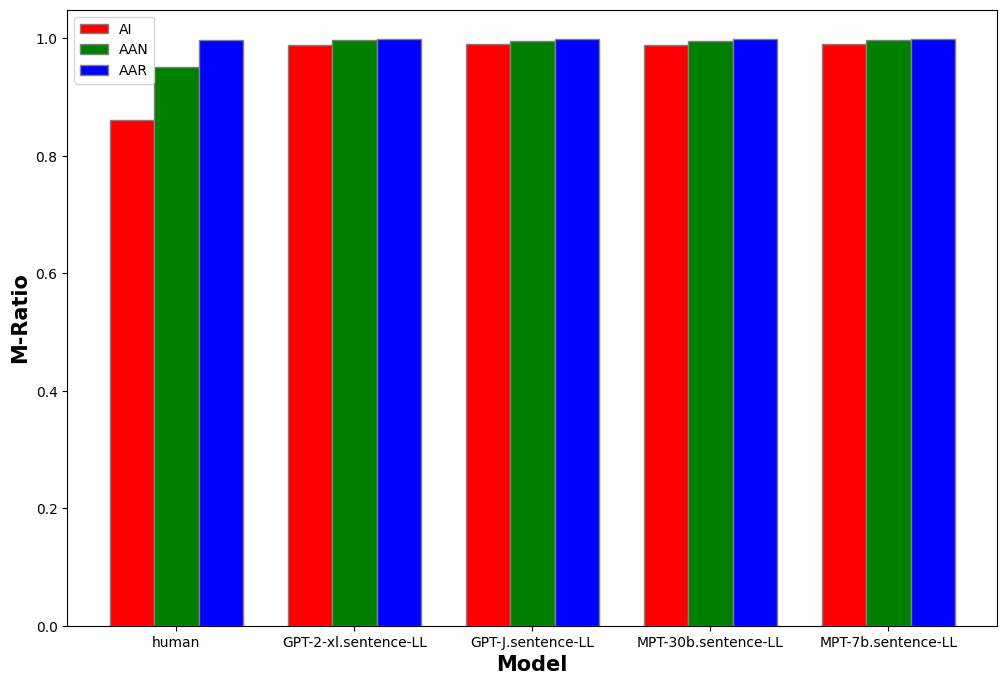

In [17]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

br1 = np.arange(len(AIMRatios)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, AIMRatios, color ='r', width = barWidth, 
        edgecolor ='grey', label ='AI') 
plt.bar(br2, AANMRatios, color ='g', width = barWidth, 
        edgecolor ='grey', label ='AAN') 
plt.bar(br3, AARMRatios, color ='b', width = barWidth, 
        edgecolor ='grey', label ='AAR') 

plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('M-Ratio', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(AIMRatios))], 
        metrics)

plt.legend()
plt.show() 